# ***Beer Style Analysis w/ Beer Advocate Data***

# Imports and Configuration

In [263]:
# Link to data source: https://www.kaggle.com/datasets/rdoume/beerreviews

# mounting google drive so files can be accessed (Colab cannot execute files stored locally on your computer)
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")



beer_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/beer_profile_and_ratings.csv')
beer_df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [264]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

# Cleaning, Renaming, Sorting, & Grouping Dataframe

In [265]:
# Drop non-essential columns
clean_beer = beer_df.drop(
    ['Name','Brewery','Beer Name (Full)','Description','Min IBU','Max IBU',
     'Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty',
     'review_aroma','review_appearance','review_palate','review_taste'], axis=1)

clean_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Style              3197 non-null   object 
 1   ABV                3197 non-null   float64
 2   review_overall     3197 non-null   float64
 3   number_of_reviews  3197 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 100.0+ KB


In [266]:
from pandas.core import groupby
# Grouping
group_beer = clean_beer.groupby(by='Style', as_index=False).mean()
# index set to 'false' to keep 'Style' as column. Otherwise, the column would be lost after the Groupby clause.
# Aggregation using mean function executed along with groupby clause.

# Renaming column names for better visual understanding
avg_beer = group_beer.rename(columns={'ABV': 'AVG_ABV','review_overall':'AVG_Rating','number_of_reviews': 'AVG_Reviews'})


# **Hypothesis #1**
There is a correlation between number of reviews and rating.

Ho: There is a no correlation between the number of reviews and beer rating. 

Ha: There is a strong correlation between the number of reviews and beer rating.

The average number of reviews is 233.28


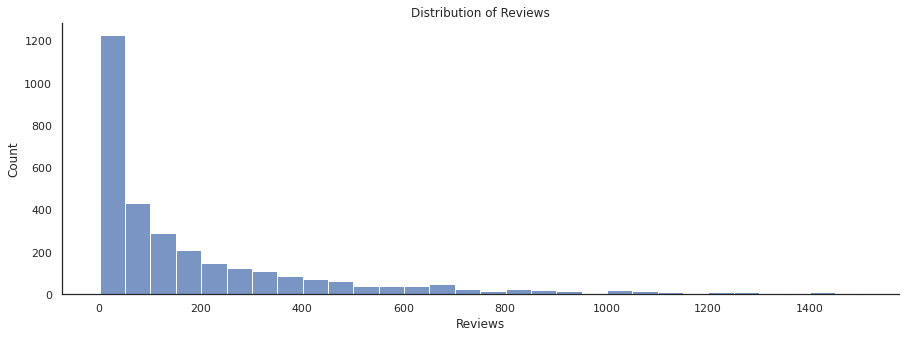

In [267]:
# Average number of reviews
review_mean = clean_beer['number_of_reviews'].mean()
print(f'The average number of reviews is {review_mean:.2f}')

# print(f'The average number of reviews is {less_reviews:.2f}')


# Beer with less than 1500 reviews
less_reviews = clean_beer[clean_beer['number_of_reviews']<=1500]
# Reviews beyond 1500 were few and far between, which had a negative impact on the visualization.
# Condensing the x-axis values to <=1500 reviews creates a better distribution visually,
# without misrepresenting the data.

plt.figure(figsize = (15,5))

sns.histplot(less_reviews['number_of_reviews'], binwidth=50)

sns.despine()
plt.xlabel('Reviews')
plt.title("Distribution of Reviews")
plt.show()

The distribution of 'Reviews' is right-skewed, indicating that outliers are farther to the right. WIth the bin range equal to 50 reviews, you can see that the majority of beers have 50 reviews or less, and maintains an average of 233.28 reviews per beer.

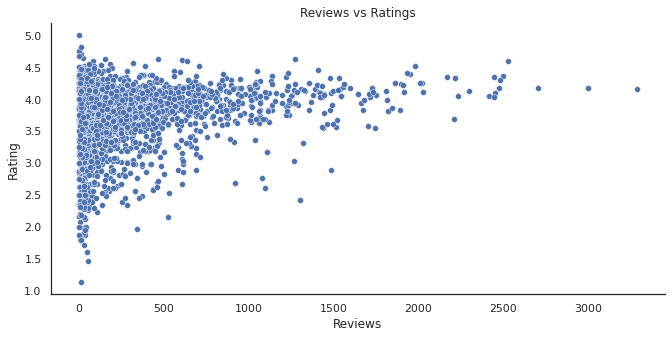

(0.17651138884966602, 8.69180368813497e-24)
The correlation is positive (0.177) and statistically significant with a p-value < 0.05.


In [268]:
# let's pull the original trimmed dataset in for this correlation, not the recently developed top 10 averages
clean_beer.head(10)

plt.figure(figsize = (11,5))

sns.scatterplot(x='number_of_reviews', y='review_overall', data= clean_beer)

sns.despine()
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title("Reviews vs Ratings")
plt.show()

print((stats.pearsonr(clean_beer['number_of_reviews'], clean_beer['review_overall'])))
#Pearson's r test returning the correlation score and the p-value. Correlation between 'Reviews' and 'Rating.'
print('The correlation is positive (0.177) and statistically significant with a p-value < 0.05.')

**Findings of distribution and correlation visualizations:**
The scatter plots show a strong correlation (0.177) for Ratings compared against Reviews of beer. This is statistically significant, with a p-value < 0.05. In this case, we reject the null hypothesis and accept the alternative. It means that the more a particular beer is consumed, the higher the rating tends to be.

The **main takeaway** from this is to manufacture a beer that more people will gravitate towards, which would increase consumption and reviews. We may not know how to create the perfect beer, but we can drill down further to find out which beer styles people prefer and consume more. Production and marketing can then follow once popular beer styles are established. 

**!!The 10 most popular beer styles by Average Reviews and Ratings follow!!**

# What are the 10 most popular beer Styles by Average Reviews?

In [269]:
# Sorting for top 10 results by AVG Reviews
top_10_consumed = avg_beer[['Style','AVG_Reviews']].head(10).sort_values(by='AVG_Reviews',ascending=False)
top_10_consumed

,Style,AVG_Reviews
8,Bock - Doppelbock,298.775000
1,Barleywine - American,289.894737
2,Barleywine - English,237.615385
4,Bitter - English Extra Special / Strong Bitter...,226.545455
6,Blonde Ale - American,145.451613
7,Blonde Ale - Belgian,115.545455
3,Bitter - English,111.341463
0,Altbier,106.820513
9,Bock - Eisbock,80.142857
5,Bière de Champagne / Bière Brut,69.625000


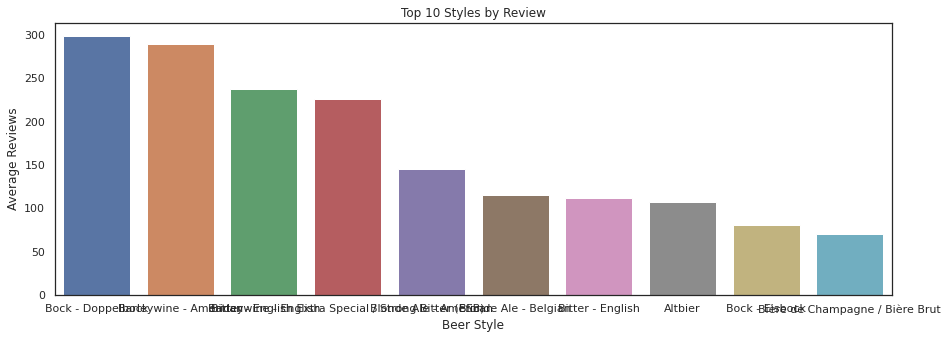

[Text(0, 0, 'Bock - Doppelbock'),
 Text(1, 0, 'Barleywine - American'),
 Text(2, 0, 'Barleywine - English'),
 Text(3, 0, 'Bitter - English Extra Special / Strong Bitter (ESB)'),
 Text(4, 0, 'Blonde Ale - American'),
 Text(5, 0, 'Blonde Ale - Belgian'),
 Text(6, 0, 'Bitter - English'),
 Text(7, 0, 'Altbier'),
 Text(8, 0, 'Bock - Eisbock'),
 Text(9, 0, 'Bière de Champagne / Bière Brut')]

In [270]:
import matplotlib.pyplot as plt

# setting the figure size
plt.figure(figsize=(15,5))

ax = sns.barplot(data=top_10_consumed, x='Style', y='AVG_Reviews')

# Chart Labels
plt.xlabel('Beer Style')
plt.ylabel('Average Reviews')
plt.title("Top 10 Styles by Review")
plt.show()

# X-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# Without rotation of x-axis labels, the long style names overlap.. making it unreadable
# Just as well, rotating < 90 creates an offset because the style names are so long. 90 creates too long of depth
# The next code line outlines a way to define a function to wrap the characters of the x-axis labels to make them more legible
# Below is the visual of why the following change needed to be made



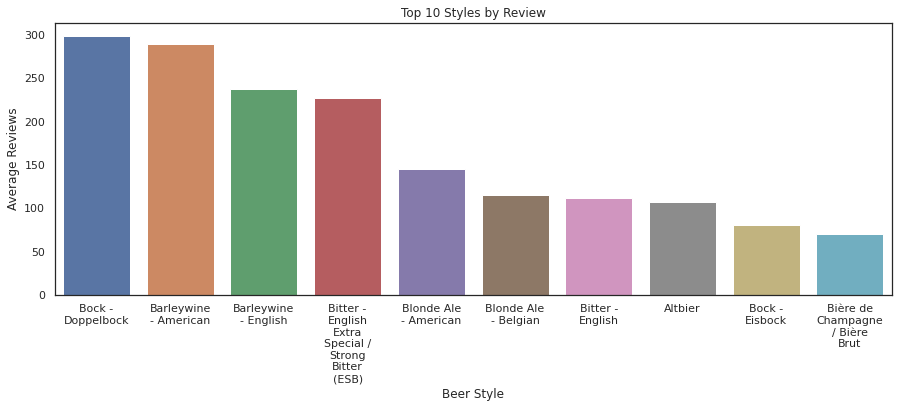

In [271]:
# The below function uses the textwrap standard library to break strings at spaces at the given width, 
# with the option to break in the middle of words.
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
# We use the function to wrap the words at or before the 10th character.
wrap_labels(ax, 10)
ax.figure

# What are the 10 most popular beer Styles by Average Rating?

In [272]:
# Sorting for top 10 accoridng to AVG Rating
top_10_r = avg_beer[['Style','AVG_Rating']].head(10).sort_values(by='AVG_Rating',ascending=False)
top_10_r

,Style,AVG_Rating
5,Bière de Champagne / Bière Brut,4.028639
2,Barleywine - English,3.937776
0,Altbier,3.917012
1,Barleywine - American,3.898977
4,Bitter - English Extra Special / Strong Bitter...,3.866874
8,Bock - Doppelbock,3.828293
3,Bitter - English,3.824466
9,Bock - Eisbock,3.802315
7,Blonde Ale - Belgian,3.733627
6,Blonde Ale - American,3.710353


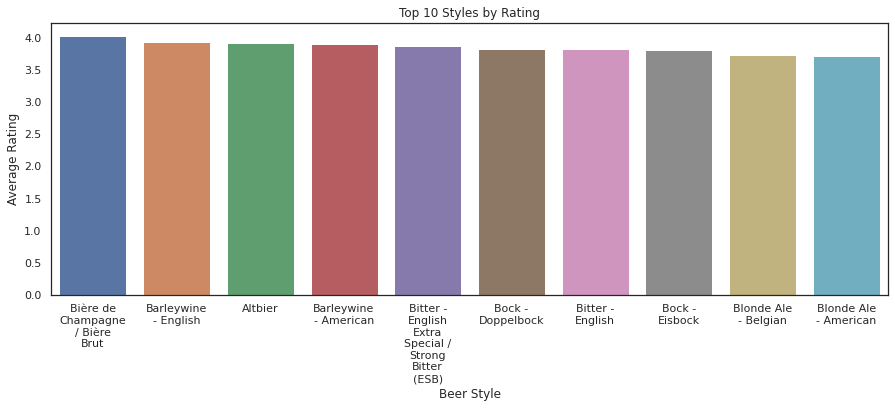

In [273]:
plt.figure(figsize=(15,5))

top_10_rated = sns.barplot(data=top_10_r, x='Style', y='AVG_Rating')


def wrap_labels(top_10_rated, width, break_long_words=False):
    labels = []
    for label in top_10_rated.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    top_10_rated.set_xticklabels(labels, rotation=0)

# We use the function to wrap the words at or before the 10th character.
wrap_labels(top_10_rated, 10)

plt.xlabel('Beer Style')
plt.ylabel('Average Rating')
plt.title("Top 10 Styles by Rating")
plt.show()


**Summary of findings for hypothesis #2:**

*'Top 10 Styles by Reviews':*
*   'Bock - Dopplebock' beer styles, on average, are consumed more than any other.
*  Referencing the bar chart above, beer styles being consumed more often could help guide decisions for volume produced and increase revenue from supply and demand of availability. 
* The owner of a brewery might choose to focus on these particular beer styles first to increase the likelihood patrons visit their establishment because these beer styles are consumed and reviewed more than other beer styles.

*'Top 10 Styles by Rating':*
*   'Bière de Champagne / Bière Brut' beer styles, on average, are rated higher than any other.
* Average Rating may be an indicator for overall satisfaction of a beer style. Customer satisfaction may lead to recurring visits, leading to an increase in consumption and overall revenue. This would help guide a brewing company to create styles that customers tend to be most satisfied with, further strenghtening the return on their investment.

# **Hypothesis #2**
There is a correlation between Alcohol by Volume (ABV) and Ratings.

Ho: ABV has no correlation with rating. 

Ha: ABV has a strong correlation with rating.

The average rating is 3.75


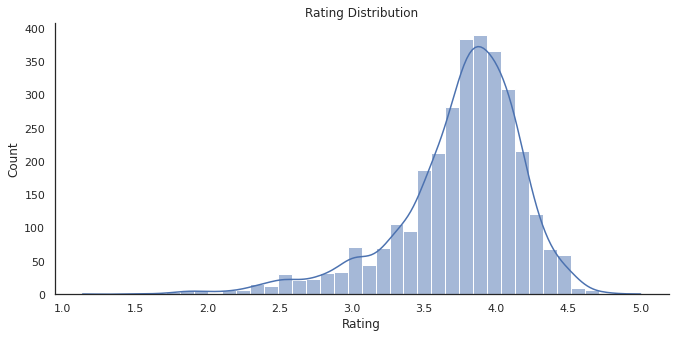

In [274]:
# Viewing beer styles with 20% ABV or less
less_ABV = clean_beer[clean_beer['ABV']<=20]
mean_rating = less_ABV['review_overall'].mean()
print(f'The average rating is {mean_rating:.2f}')

plt.figure(figsize = (11,5))

sns.histplot(less_ABV['review_overall'], bins=40, kde=True)

sns.despine()
plt.xlabel('Rating')
plt.title("Rating Distribution")
plt.show()


The distribution of 'Ratings' is left-skewed, indicating that outliers are farther to the left. The average rating per beer is 3.75/5, further suggesting rating is more positive.

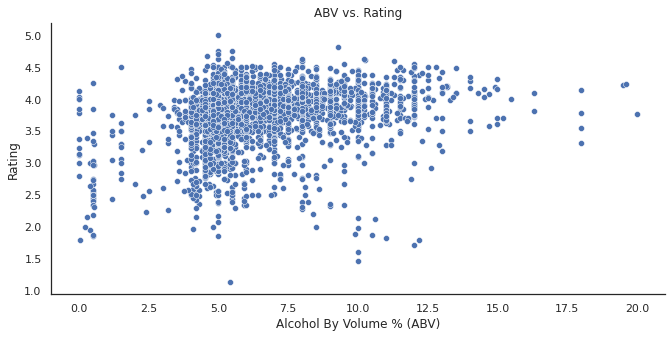

(0.2733524604815852, 7.625999539455006e-56)
The correlation is positive (0.273) and statistically significant with a p-value < 0.05.


In [275]:
# # Viewing beer styles with 20% ABV or less
# less_ABV = clean_beer[clean_beer['ABV']<=20]

sns.set_style("white")
plt.figure(figsize = (11,5))

sns.scatterplot(x='ABV', y='review_overall', data= less_ABV)

sns.despine()
plt.xlabel('Alcohol By Volume % (ABV)')
plt.ylabel('Rating')
plt.title("ABV vs. Rating")
plt.show()

print(stats.pearsonr(less_ABV['ABV'], less_ABV['review_overall'])) 
#Pearson's r test returning the correlation score and the p-value. Correlation between 'ABV' and 'Rating.'
print('The correlation is positive (0.273) and statistically significant with a p-value < 0.05.')

In [276]:

top_10_abv = avg_beer[['Style','AVG_ABV']].head(10).sort_values(by='AVG_ABV',ascending=False)
top_10_abv

,Style,AVG_ABV
9,Bock - Eisbock,16.797143
2,Barleywine - English,11.270769
1,Barleywine - American,11.165789
5,Bière de Champagne / Bière Brut,10.062500
8,Bock - Doppelbock,8.391250
7,Blonde Ale - Belgian,6.406061
4,Bitter - English Extra Special / Strong Bitter...,5.765152
0,Altbier,5.748718
6,Blonde Ale - American,4.816129
3,Bitter - English,4.334146


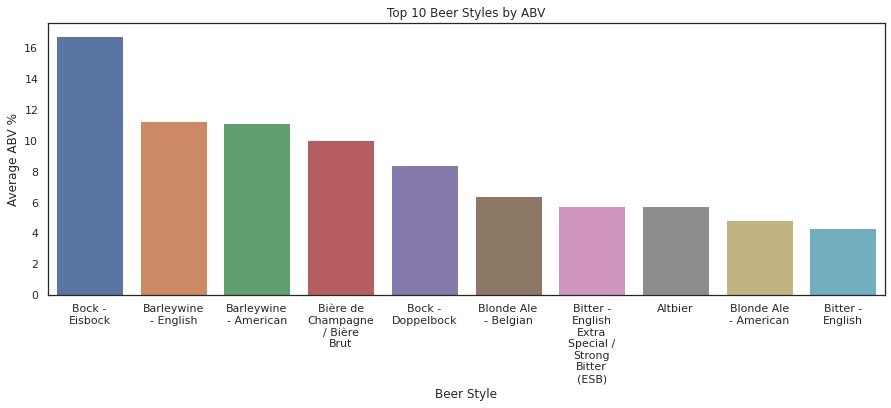

In [277]:
plt.figure(figsize=(15,5))

abv_plot = sns.barplot(data=top_10_abv, x='Style', y='AVG_ABV')

def wrap_labels(abv_plot, width, break_long_words=False):
    labels = []
    for label in abv_plot.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    abv_plot.set_xticklabels(labels, rotation=0)

# We use the function to wrap the words at or before the 10th character.
wrap_labels(abv_plot, 10)

plt.xlabel('Beer Style')
plt.ylabel('Average ABV %')
plt.title("Top 10 Beer Styles by ABV")
plt.show()

**Summary of findings for hypothesis #2:**
The scatter plot shows a strong correlation (0.273) for ABV compared against Ratings. It is statistically significant, with a p-value < 0.05. In this case, we reject the null hypothesis and accept the alternative. This means that as ABV increases, so does the likelihood that the rating will follow. 

We can infer that people tend to be more satisfied when alcohol content is higher with this correlation. The bar chart shows beer styles that have greater ABV on average, which can guide business decisions on beer styles to produce for increased revenue.